In [6]:
import numpy as np, pandas as pd, os
import matplotlib
import matplotlib.pyplot as plt
import itertools

In [7]:
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer

In [9]:
import skfuzzy as fuzz

In [11]:
iris = pd.read_csv('/home/karthik/anaconda_python/411631_kelab_record/411631_python_using/clustering/FuzzyCmeans/iris.csv')
iris.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
x = pd.DataFrame(iris, columns=['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'])
y = pd.DataFrame(iris, columns=['Target'])

In [13]:
scaler = StandardScaler()

In [14]:
X_std = scaler.fit_transform(x)

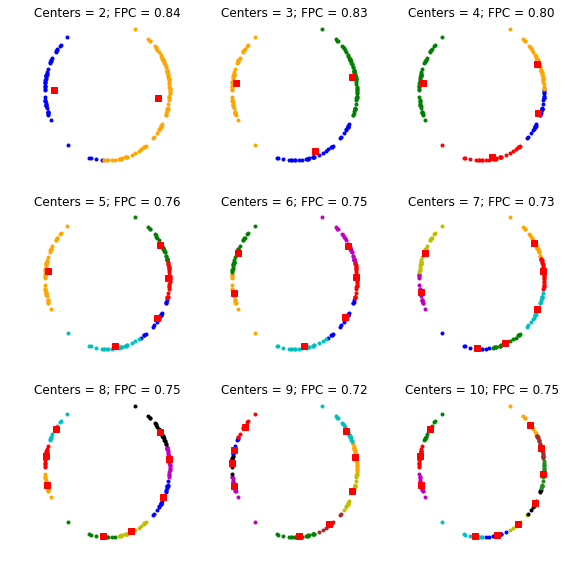

In [15]:
lsa = TruncatedSVD(2, algorithm = 'arpack')
dtm_lsa = lsa.fit_transform(X_std)
dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)
a= pd.DataFrame(dtm_lsa, columns = ["component_1","component_2"])
a['targets']=y
fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
alldata = np.vstack((a['component_1'], a['component_2']))
fpcs = []

colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen'] 

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Store fpc values for later plots
    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(a['component_1'][cluster_membership == j],
                a['component_2'][cluster_membership == j], '.', color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

fig1.tight_layout()
fig1.savefig('iris_dataset.png')